Loading FinBERT Model...


Device set to use mps:0


Analyzing Sentiment...


/var/folders/fj/3dsy68bx2v56pml4k75_pv180000gn/T/ipykernel_94791/4251641457.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Hawk_Dove_Score', data=df, palette=colors)


OSError: [Errno 30] Read-only file system: '/Fed_Sentiment_Analysis.png'

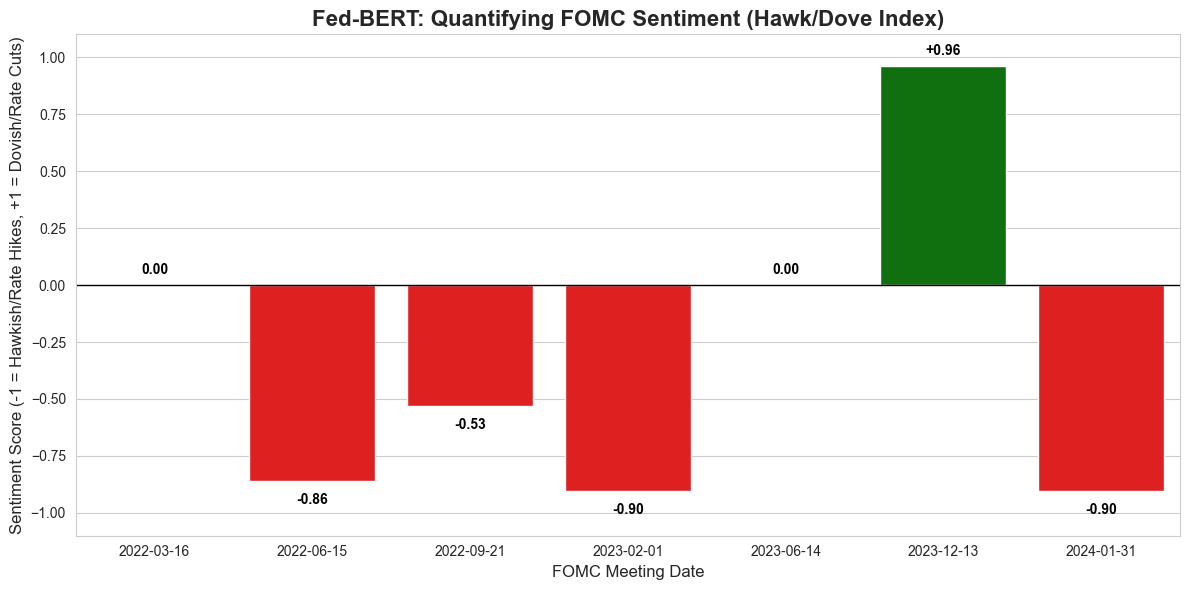

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

print("Loading FinBERT Model...")
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

data = {
    'Date': ['2022-03-16', '2022-06-15', '2022-09-21', '2023-02-01', '2023-06-14', '2023-12-13', '2024-01-31'],
    'Text': [
        "Inflation remains elevated, reflecting supply and demand imbalances related to the pandemic. The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run.", # March 22 (Start of hikes)
        "The Committee decided to raise the target range for the federal funds rate to 1-1/2 to 1-3/4 percent and anticipates that ongoing increases will be appropriate.", # June 22 (Aggressive)
        "Recent indicators point to modest growth in spending and production. Job gains have been robust in recent months, and the unemployment rate has remained low. Inflation remains elevated.", # Sept 22 (Peak Hawkish)
        "The Committee anticipates that ongoing increases in the target range will be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive.", # Feb 23 (Still hiking)
        "Holding the target range steady at this meeting allows the Committee to assess additional information and its implications for monetary policy.", # June 23 (Pause)
        "Recent indicators suggest that growth of economic activity has slowed from its strong pace in the third quarter. Inflation has eased over the past year but remains elevated.", # Dec 23 (Dovish Turn)
        "The Committee judges that the risks to achieving its employment and inflation goals are moving into better balance." # Jan 24 (Neutral/Cut signal)
    ]
}

df = pd.DataFrame(data)

print("Analyzing Sentiment...")

results = []
scores = []

for text in df['Text']:
    prediction = nlp(text)[0]
    label = prediction['label']
    score = prediction['score']

    if label == 'negative':
        sentiment_val = score 
    elif label == 'positive':
        sentiment_val = -score  
    else:
        sentiment_val = 0
        
    results.append(label)
    scores.append(sentiment_val)

df['Sentiment_Label'] = results
df['Hawk_Dove_Score'] = scores

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

colors = ['red' if x < 0 else 'green' for x in df['Hawk_Dove_Score']]
sns.barplot(x='Date', y='Hawk_Dove_Score', data=df, palette=colors)

plt.title('Fed-BERT: Quantifying FOMC Sentiment (Hawk/Dove Index)', fontsize=16, fontweight='bold')
plt.ylabel('Sentiment Score (-1 = Hawkish/Rate Hikes, +1 = Dovish/Rate Cuts)', fontsize=12)
plt.xlabel('FOMC Meeting Date', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.ylim(-1.1, 1.1)

for i, v in enumerate(df['Hawk_Dove_Score']):
    offset = 0.05 if v >= 0 else -0.1
    label = f"+{v:.2f}" if v > 0 else f"{v:.2f}"
    plt.text(i, v + offset, label, ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('Fed_Sentiment_Analysis.png', dpi=300)
plt.show()

print("\nanalysis Complete. Data Preview:")
print(df[['Date', 'Sentiment_Label', 'Hawk_Dove_Score']])